In [ ]:
!pip install google-cloud-storage
!pip install pandas

In [9]:
from google.cloud import storage
import pandas as pd

bucket_name = "nobu_w266_final_project"

storage_client = storage.Client()
bucket = storage_client.get_bucket(bucket_name)

# When you have your files in a subfolder of the bucket.
my_prefix = "OECD_US_file/" # the name of the subfolder
blobs = bucket.list_blobs(prefix = my_prefix, delimiter = '/')

for blob in blobs:
    if(blob.name != my_prefix): # ignoring the subfolder itself 
        file_name = blob.name.replace(my_prefix, "")
        blob.download_to_filename(file_name) # download the file to the machine
        df = pd.read_csv(file_name, delimiter="|") # load the data
        print(df)

          appln_id       pub_nbr  filing  tech_field  many_field  \
0         49683821    US03951277    1976          25           0   
1         48696358    US03956062    1976          27           0   
2         51805403    US03960276    1976          25           0   
3         51041941    US03963460    1976          24           1   
4         51841776    US03963546    1976          26           0   
...            ...           ...     ...         ...         ...   
8574380  516842427  US2019230828    2019           1           1   
8574381  516842321  US2019230829    2016           2           0   
8574382  516842367  US2019230830    2016           2           0   
8574383  516851404  US2019230831    2016          25           1   
8574384  516851330  US2019230832    2016           2           1   

         patent_scope  family_size  grant_lag  bwd_cits  npl_cits  ...  \
0                   1            5      106.0         5         0  ...   
1                   1            1 

In [21]:
# Now try to pull the patent data combining 2 files to accumulate 1 year
from google.cloud import storage
import pandas as pd

bucket_name = "nobu_w266_final_project"

storage_client = storage.Client()
bucket = storage_client.get_bucket(bucket_name)

# When you have your files in a subfolder of the bucket.
my_prefix = "Patent_US/" # the name of the subfolder
blobs = bucket.list_blobs(prefix = my_prefix, delimiter = '/')

patent_data_combine = None

for blob in blobs:
    if(blob.name != my_prefix): # ignoring the subfolder itself 
        file_name = blob.name.replace(my_prefix, "")
        blob.download_to_filename(file_name) # download the file to the machine
        patent_data = pd.read_csv(file_name) # load the data
        # print(patent_data)
        if patent_data_combine is None:
            patent_data_combine = patent_data
        else:
            patent_data_combine = patent_data_combine.append(patent_data)

In [22]:
patent_data_combine.head()

,publication_number,abstract_text,filing_date,title_text,claims_text
0,US-10073820-B2,A method executed on an access device includes...,20101231,"Systems, methods, and interfaces for paginatio...",The invention claimed is: \n \n 1. A...
1,US-10073820-B2,A method executed on an access device includes...,20101231,"Systems, methods, and interfaces for paginatio...",The invention claimed is: \n \n 1. A...
2,US-10174730-B2,A fuel injector for use in delivering fuel to ...,20100722,Fuel injector,The invention claimed is: \n \n 1. A...
3,US-10174730-B2,A fuel injector for use in delivering fuel to ...,20100722,Fuel injector,The invention claimed is: \n \n 1. A...
4,US-9111098-B2,An asset management system is provided which c...,20100712,System and method for managing electronic assets,The invention claimed is: \n \n 1. A...


In [23]:
patent_data_combine['publication_number_match'] = 'US0' + patent_data_combine['publication_number'].str[3:-3]

### drop duplicated rows

In [24]:
patent_data_combine.drop_duplicates(subset='publication_number_match', keep = 'first', inplace = True)
patent_data_combine

,publication_number,abstract_text,filing_date,title_text,claims_text,publication_number_match
0,US-10073820-B2,A method executed on an access device includes...,20101231,"Systems, methods, and interfaces for paginatio...",The invention claimed is: \n \n 1. A...,US010073820
2,US-10174730-B2,A fuel injector for use in delivering fuel to ...,20100722,Fuel injector,The invention claimed is: \n \n 1. A...,US010174730
4,US-9111098-B2,An asset management system is provided which c...,20100712,System and method for managing electronic assets,The invention claimed is: \n \n 1. A...,US09111098
5,US-9276710-B2,Techniques for supporting communication with c...,20101209,Method and apparatus for resource allocation w...,What is claimed is: \n \n 1. A metho...,US09276710
6,US-9353996-B2,A pressure difference driven heat spreader inc...,20100830,Pressure difference driven heat spreader,What is claimed is: \n \n 1. A press...,US09353996
...,...,...,...,...,...,...
102425,US-9808963-B2,The invention relates to a method and to an as...,20100414,Method for recycling plastic materials,The invention claimed is: \n \n 1. A...,US09808963
102426,US-9827386-B2,A pressurized flow of breathable gas is delive...,20100511,System and method for controlling leakage of a...,The invention claimed is: \n \n 1. A...,US09827386
102427,US-9623150-B2,"An injectable hydrogel, includes, in weight, i...",20100514,Injectable hydrogel for the long-term suppleme...,The invention claimed is: \n \n 1. A...,US09623150
102428,US-9717691-B2,The present invention relates to a medicament ...,20100603,Pharmaceutical containing a hormone combinatio...,The invention claimed is: \n \n 1. A...,US09717691


### merge two daraframes

In [25]:
df_merge = pd.merge(patent_data_combine, df, left_on='publication_number_match', right_on='pub_nbr', how='inner')
df_merge

,publication_number,abstract_text,filing_date,title_text,claims_text,publication_number_match,appln_id,pub_nbr,filing,tech_field,...,claims_bwd,fwd_cits5,fwd_cits7,breakthrough,generality,originality,radicalness,renewal,quality_index_4,quality_index_6
0,US-9111098-B2,An asset management system is provided which c...,20100712,System and method for managing electronic assets,The invention claimed is: \n \n 1. A...,US09111098,330389907,US09111098,2010,6,...,NaN,18,42,0,0.657428,0.921539,0.550505,5.0,0.419565,0.372142
1,US-9276710-B2,Techniques for supporting communication with c...,20101209,Method and apparatus for resource allocation w...,What is claimed is: \n \n 1. A metho...,US09276710,340923572,US09276710,2010,4,...,NaN,26,27,0,0.545600,0.919802,0.269565,6.0,0.469674,0.441058
2,US-9353996-B2,A pressure difference driven heat spreader inc...,20100830,Pressure difference driven heat spreader,What is claimed is: \n \n 1. A press...,US09353996,341089247,US09353996,2010,30,...,NaN,1,3,0,0.693878,0.786704,0.157895,6.0,0.327714,0.273524
3,US-9289847-B2,A manufacturing method for a module having a h...,20100903,Method for manufacturing a module with a hollo...,The invention claimed is: \n \n 1. A...,US09289847,364666123,US09289847,2010,26,...,NaN,2,2,0,0.835000,0.910671,0.373134,6.0,0.434408,0.352743
4,US-9215628-B2,A method and a system for processing a Radio L...,20100928,Method for processing radio link failure repor...,What is claimed is: \n \n 1. A metho...,US09215628,333088623,US09215628,2010,4,...,NaN,37,45,0,0.157116,0.877355,0.327273,5.0,0.228800,0.221936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206112,US-9808963-B2,The invention relates to a method and to an as...,20100414,Method for recycling plastic materials,The invention claimed is: \n \n 1. A...,US09808963,353114102,US09808963,2010,29,...,NaN,16,16,0,0.770303,0.905679,0.622222,7.0,0.587056,0.402361
206113,US-9827386-B2,A pressurized flow of breathable gas is delive...,20100511,System and method for controlling leakage of a...,The invention claimed is: \n \n 1. A...,US09827386,352141200,US09827386,2010,13,...,NaN,4,4,0,0.480987,0.637119,0.500000,7.0,0.252828,0.195668
206114,US-9623150-B2,"An injectable hydrogel, includes, in weight, i...",20100514,Injectable hydrogel for the long-term suppleme...,The invention claimed is: \n \n 1. A...,US09623150,353471133,US09623150,2010,14,...,NaN,3,3,0,0.486111,0.834699,0.057971,7.0,0.271880,0.205123
206115,US-9717691-B2,The present invention relates to a medicament ...,20100603,Pharmaceutical containing a hormone combinatio...,The invention claimed is: \n \n 1. A...,US09717691,330992028,US09717691,2010,16,...,NaN,0,0,0,NaN,0.716263,0.058824,7.0,0.125815,0.108816


### keep only quality_index_4 >= 0

In [30]:
df_merge_quality = df_merge[(df_merge['quality_index_4'] >=0) & (len(df_merge['title_text']) >0) & (len(df_merge['abstract_text']) >0) & (len(df_merge['claims_text']) >0)]

In [31]:
df_merge_quality

,publication_number,abstract_text,filing_date,title_text,claims_text,publication_number_match,appln_id,pub_nbr,filing,tech_field,...,claims_bwd,fwd_cits5,fwd_cits7,breakthrough,generality,originality,radicalness,renewal,quality_index_4,quality_index_6
0,US-9111098-B2,An asset management system is provided which c...,20100712,System and method for managing electronic assets,The invention claimed is: \n \n 1. A...,US09111098,330389907,US09111098,2010,6,...,NaN,18,42,0,0.657428,0.921539,0.550505,5.0,0.419565,0.372142
1,US-9276710-B2,Techniques for supporting communication with c...,20101209,Method and apparatus for resource allocation w...,What is claimed is: \n \n 1. A metho...,US09276710,340923572,US09276710,2010,4,...,NaN,26,27,0,0.545600,0.919802,0.269565,6.0,0.469674,0.441058
2,US-9353996-B2,A pressure difference driven heat spreader inc...,20100830,Pressure difference driven heat spreader,What is claimed is: \n \n 1. A press...,US09353996,341089247,US09353996,2010,30,...,NaN,1,3,0,0.693878,0.786704,0.157895,6.0,0.327714,0.273524
3,US-9289847-B2,A manufacturing method for a module having a h...,20100903,Method for manufacturing a module with a hollo...,The invention claimed is: \n \n 1. A...,US09289847,364666123,US09289847,2010,26,...,NaN,2,2,0,0.835000,0.910671,0.373134,6.0,0.434408,0.352743
4,US-9215628-B2,A method and a system for processing a Radio L...,20100928,Method for processing radio link failure repor...,What is claimed is: \n \n 1. A metho...,US09215628,333088623,US09215628,2010,4,...,NaN,37,45,0,0.157116,0.877355,0.327273,5.0,0.228800,0.221936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206112,US-9808963-B2,The invention relates to a method and to an as...,20100414,Method for recycling plastic materials,The invention claimed is: \n \n 1. A...,US09808963,353114102,US09808963,2010,29,...,NaN,16,16,0,0.770303,0.905679,0.622222,7.0,0.587056,0.402361
206113,US-9827386-B2,A pressurized flow of breathable gas is delive...,20100511,System and method for controlling leakage of a...,The invention claimed is: \n \n 1. A...,US09827386,352141200,US09827386,2010,13,...,NaN,4,4,0,0.480987,0.637119,0.500000,7.0,0.252828,0.195668
206114,US-9623150-B2,"An injectable hydrogel, includes, in weight, i...",20100514,Injectable hydrogel for the long-term suppleme...,The invention claimed is: \n \n 1. A...,US09623150,353471133,US09623150,2010,14,...,NaN,3,3,0,0.486111,0.834699,0.057971,7.0,0.271880,0.205123
206115,US-9717691-B2,The present invention relates to a medicament ...,20100603,Pharmaceutical containing a hormone combinatio...,The invention claimed is: \n \n 1. A...,US09717691,330992028,US09717691,2010,16,...,NaN,0,0,0,NaN,0.716263,0.058824,7.0,0.125815,0.108816


In [32]:
max(df_merge_quality['quality_index_4'])

0.9825681514422059

In [33]:
min(df_merge_quality['quality_index_4'])

0.0137609649122807

In [34]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

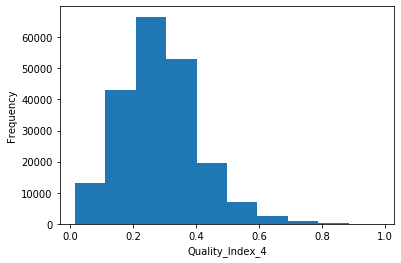

In [35]:
plt.hist(df_merge_quality['quality_index_4'], density=False)  # `density=False` would make counts
plt.ylabel('Frequency')
plt.xlabel('Quality_Index_4');

In [36]:
conditions = [

    (df_merge_quality['quality_index_4'] < 0.3),
    (df_merge_quality['quality_index_4'] >= 0.3)
]

choices = ['0', '1']

In [37]:
import numpy as np
df_merge_quality['quality_rank'] = np.select(condlist=conditions, choicelist=choices)

In [38]:
df_merge_quality

,publication_number,abstract_text,filing_date,title_text,claims_text,publication_number_match,appln_id,pub_nbr,filing,tech_field,...,fwd_cits5,fwd_cits7,breakthrough,generality,originality,radicalness,renewal,quality_index_4,quality_index_6,quality_rank
0,US-9111098-B2,An asset management system is provided which c...,20100712,System and method for managing electronic assets,The invention claimed is: \n \n 1. A...,US09111098,330389907,US09111098,2010,6,...,18,42,0,0.657428,0.921539,0.550505,5.0,0.419565,0.372142,1
1,US-9276710-B2,Techniques for supporting communication with c...,20101209,Method and apparatus for resource allocation w...,What is claimed is: \n \n 1. A metho...,US09276710,340923572,US09276710,2010,4,...,26,27,0,0.545600,0.919802,0.269565,6.0,0.469674,0.441058,1
2,US-9353996-B2,A pressure difference driven heat spreader inc...,20100830,Pressure difference driven heat spreader,What is claimed is: \n \n 1. A press...,US09353996,341089247,US09353996,2010,30,...,1,3,0,0.693878,0.786704,0.157895,6.0,0.327714,0.273524,1
3,US-9289847-B2,A manufacturing method for a module having a h...,20100903,Method for manufacturing a module with a hollo...,The invention claimed is: \n \n 1. A...,US09289847,364666123,US09289847,2010,26,...,2,2,0,0.835000,0.910671,0.373134,6.0,0.434408,0.352743,1
4,US-9215628-B2,A method and a system for processing a Radio L...,20100928,Method for processing radio link failure repor...,What is claimed is: \n \n 1. A metho...,US09215628,333088623,US09215628,2010,4,...,37,45,0,0.157116,0.877355,0.327273,5.0,0.228800,0.221936,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206112,US-9808963-B2,The invention relates to a method and to an as...,20100414,Method for recycling plastic materials,The invention claimed is: \n \n 1. A...,US09808963,353114102,US09808963,2010,29,...,16,16,0,0.770303,0.905679,0.622222,7.0,0.587056,0.402361,1
206113,US-9827386-B2,A pressurized flow of breathable gas is delive...,20100511,System and method for controlling leakage of a...,The invention claimed is: \n \n 1. A...,US09827386,352141200,US09827386,2010,13,...,4,4,0,0.480987,0.637119,0.500000,7.0,0.252828,0.195668,0
206114,US-9623150-B2,"An injectable hydrogel, includes, in weight, i...",20100514,Injectable hydrogel for the long-term suppleme...,The invention claimed is: \n \n 1. A...,US09623150,353471133,US09623150,2010,14,...,3,3,0,0.486111,0.834699,0.057971,7.0,0.271880,0.205123,0
206115,US-9717691-B2,The present invention relates to a medicament ...,20100603,Pharmaceutical containing a hormone combinatio...,The invention claimed is: \n \n 1. A...,US09717691,330992028,US09717691,2010,16,...,0,0,0,NaN,0.716263,0.058824,7.0,0.125815,0.108816,0


In [39]:
df_merge_quality.quality_rank.value_counts()

0    119116
1     87001
Name: quality_rank, dtype: int64

In [40]:
119116/(119116+87001)

0.5779047822353324

In [41]:
df_merge_quality['text'] = df_merge_quality['title_text'] + '. ' + df_merge_quality['abstract_text']

In [42]:
df_merge_quality

,publication_number,abstract_text,filing_date,title_text,claims_text,publication_number_match,appln_id,pub_nbr,filing,tech_field,...,fwd_cits7,breakthrough,generality,originality,radicalness,renewal,quality_index_4,quality_index_6,quality_rank,text
0,US-9111098-B2,An asset management system is provided which c...,20100712,System and method for managing electronic assets,The invention claimed is: \n \n 1. A...,US09111098,330389907,US09111098,2010,6,...,42,0,0.657428,0.921539,0.550505,5.0,0.419565,0.372142,1,System and method for managing electronic asse...
1,US-9276710-B2,Techniques for supporting communication with c...,20101209,Method and apparatus for resource allocation w...,What is claimed is: \n \n 1. A metho...,US09276710,340923572,US09276710,2010,4,...,27,0,0.545600,0.919802,0.269565,6.0,0.469674,0.441058,1,Method and apparatus for resource allocation w...
2,US-9353996-B2,A pressure difference driven heat spreader inc...,20100830,Pressure difference driven heat spreader,What is claimed is: \n \n 1. A press...,US09353996,341089247,US09353996,2010,30,...,3,0,0.693878,0.786704,0.157895,6.0,0.327714,0.273524,1,Pressure difference driven heat spreader. A pr...
3,US-9289847-B2,A manufacturing method for a module having a h...,20100903,Method for manufacturing a module with a hollo...,The invention claimed is: \n \n 1. A...,US09289847,364666123,US09289847,2010,26,...,2,0,0.835000,0.910671,0.373134,6.0,0.434408,0.352743,1,Method for manufacturing a module with a hollo...
4,US-9215628-B2,A method and a system for processing a Radio L...,20100928,Method for processing radio link failure repor...,What is claimed is: \n \n 1. A metho...,US09215628,333088623,US09215628,2010,4,...,45,0,0.157116,0.877355,0.327273,5.0,0.228800,0.221936,0,Method for processing radio link failure repor...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206112,US-9808963-B2,The invention relates to a method and to an as...,20100414,Method for recycling plastic materials,The invention claimed is: \n \n 1. A...,US09808963,353114102,US09808963,2010,29,...,16,0,0.770303,0.905679,0.622222,7.0,0.587056,0.402361,1,Method for recycling plastic materials. The in...
206113,US-9827386-B2,A pressurized flow of breathable gas is delive...,20100511,System and method for controlling leakage of a...,The invention claimed is: \n \n 1. A...,US09827386,352141200,US09827386,2010,13,...,4,0,0.480987,0.637119,0.500000,7.0,0.252828,0.195668,0,System and method for controlling leakage of a...
206114,US-9623150-B2,"An injectable hydrogel, includes, in weight, i...",20100514,Injectable hydrogel for the long-term suppleme...,The invention claimed is: \n \n 1. A...,US09623150,353471133,US09623150,2010,14,...,3,0,0.486111,0.834699,0.057971,7.0,0.271880,0.205123,0,Injectable hydrogel for the long-term suppleme...
206115,US-9717691-B2,The present invention relates to a medicament ...,20100603,Pharmaceutical containing a hormone combinatio...,The invention claimed is: \n \n 1. A...,US09717691,330992028,US09717691,2010,16,...,0,0,NaN,0.716263,0.058824,7.0,0.125815,0.108816,0,Pharmaceutical containing a hormone combinatio...


In [45]:
data_train = df_merge_quality.sample(frac=1)[:5000]
data_train

,publication_number,abstract_text,filing_date,title_text,claims_text,publication_number_match,appln_id,pub_nbr,filing,tech_field,...,fwd_cits7,breakthrough,generality,originality,radicalness,renewal,quality_index_4,quality_index_6,quality_rank,text
33824,US-8891319-B2,Embodiments disclosed herein may relate to app...,20101130,Verify or read pulse for phase change memory a...,The invention claimed is: \n \n 1. A...,US08891319,363984094,US08891319,2010,6,...,6,0,0.526667,0.500000,0.000000,4.0,0.241620,0.245070,0,Verify or read pulse for phase change memory a...
76682,US-8177574-B2,The invention relates to an electrical connect...,20100910,Electrical connector capable of preventing sol...,"1. An electrical connector, comprising:\n an i...",US08177574,336009504,US08177574,2010,1,...,7,0,0.000000,0.908889,0.733333,5.0,0.193442,0.273997,0,Electrical connector capable of preventing sol...
161789,US-8469764-B2,"In one aspect, the present invention is direct...",20100304,Toy building construction set,What is claimed is: \n \n 1. A toy b...,US08469764,322475111,US08469764,2010,33,...,3,0,0.708333,0.749527,0.532609,6.0,0.318658,0.330711,1,"Toy building construction set. In one aspect, ..."
109822,US-8438905-B2,A method for sensing analyte. The method inclu...,20100615,Method and apparatus for vapor signature with ...,What is claimed: \n \n 1. A method f...,US08438905,338448172,US08438905,2010,10,...,5,0,0.351007,0.795910,0.388889,6.0,0.143789,0.211805,0,Method and apparatus for vapor signature with ...
115395,US-8775360-B2,The program makes a computer function as a sig...,20100503,Significance evaluation program and recording ...,What is claimed is: \n \n 1. A non-t...,US08775360,332861106,US08775360,2010,6,...,0,0,NaN,0.818339,0.411765,4.0,0.076389,0.142327,0,Significance evaluation program and recording ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146585,US-8179360-B2,A gate driving circuit including M shift regis...,20100111,Display and gate driver circuit thereof,"1. A gate driving circuit, comprising:\n M shi...",US08179360,333864519,US08179360,2010,2,...,6,0,0.375000,0.844181,0.666667,5.0,0.197655,0.262839,0,Display and gate driver circuit thereof. A gat...
46271,US-8093813-B2,A plasma display panel enhancing an emission e...,20100831,Plasma display panel,"1. A plasma display panel, comprising:\n a fir...",US08093813,333369330,US08093813,2010,1,...,1,0,NaN,0.448889,0.133333,6.0,0.188889,0.286021,0,Plasma display panel. A plasma display panel e...
89482,US-7985975-B2,Example embodiments may include a light emitti...,20100729,Light emitting package and light emitting pack...,1. A light emitting package comprising:\n a li...,US07985975,329003886,US07985975,2010,8,...,13,0,0.402872,0.752834,0.238095,4.0,0.307586,0.350550,1,Light emitting package and light emitting pack...
162841,US-8431274-B2,The present invention comprises fuel cells 84...,20100331,Solid oxide fuel cell device,What is claimed is: \n \n 1. A solid...,US08431274,340924490,US08431274,2010,1,...,5,0,0.266853,0.414278,0.279070,6.0,0.251822,0.282151,0,Solid oxide fuel cell device. The present inve...


In [44]:
data_train.to_csv('US_patent_abstract_5000_2015_with_title_1.csv')

In [46]:
data_train.to_csv('US_patent_abstract_5000_2015_with_title_2.csv')